# Segementacion, deteccion de bordes y filtrado de caracteres
En este segemento de codigo, se separan los caracteres de las matriculas, para finalmente prepar el data frame para su respectivo entrenamiento
*   Bryan Castro Lugo 2420171011
*   Gildardo Hernandez Palma 2420171024 

In [1]:
'''
!pip install opencv-python
!pip install requests
!pip install tensorflow
!pip install unidecode
'''
from skimage import io # Libreria para cargar imagenes desde URLs
import random
import requests
import cv2
import pandas as pd
from unidecode import unidecode
import matplotlib.pyplot as plt
import numpy as np
import imageio as io
import os
from sklearn.neural_network import MLPClassifier

In [2]:
placa = "TQR698"
url_imagen = "https://matriculasdelmundo.com/gCOL1.php?textCOL1="+placa+"&textCOL10="+"    Ibague"#ciudad[i] # El link de la imagen
nombre_local_imagen = placa+".jpg"# El nombre con el que queremos guardarla
imagen = requests.get(url_imagen).content #Imagen en bytes
open(nombre_local_imagen, 'wb').write(imagen)


15184

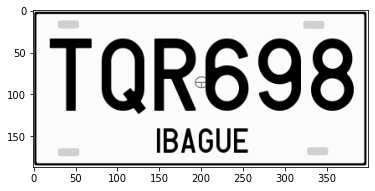

In [3]:
image = cv2.imread(placa+".jpg") #a color
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap='gray')#PLaca como imágen de bordes

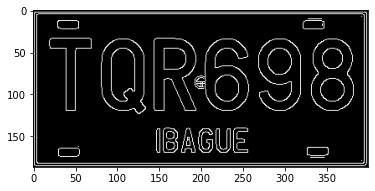

In [4]:
borde = cv2.Canny(image_gray,3,3)
plt.imshow(borde, cmap="gray")#PLaca como imágen de bordes

contours, hierarchy = cv2.findContours(borde, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  
cv2.imshow('Canny Edges After Contouring', borde)
cv2.waitKey(0)

In [5]:
im = cv2.imread(placa+'.jpg')
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
borde = cv2.Canny(image_gray, 50, 150)
ret, thresh = cv2.threshold(borde, 0, 255, 0)
cnt, hierarchy = cv2.findContours(borde, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [6]:
num = len(cnt)
box = np.zeros((num,4))
for j in range(num):
    box[j,:] = cv2.boundingRect(cnt[j]) #Halla el bounding box del contorno
Box = np.zeros((20,4))
L,A = thresh.shape
q= 0
for j in range(num):
    p =box[j,:]
    if p[3] >=0.4*L and p[3]<= 0.7*L and p[2]>=0.06*A and p[2]<=0.17*A:
        Box[q] = p
        q+=1
BOX = np.zeros((6,4))
num = len(Box)
q = 0
for j in range(num):
    if j%2 ==0 and j <11:
        BOX[q] = Box[j]
        q+=1
BOX=BOX.astype(int)


In [7]:
box = box.astype(int)
BOX=box

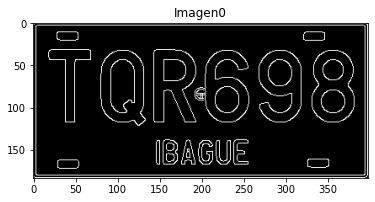

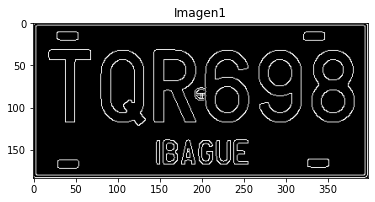

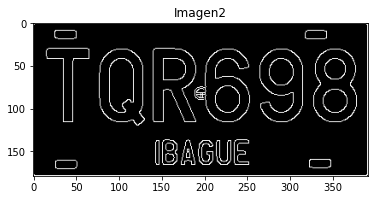

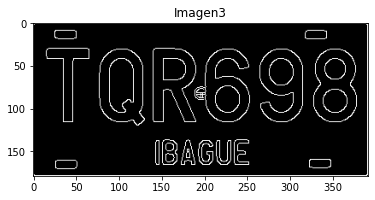

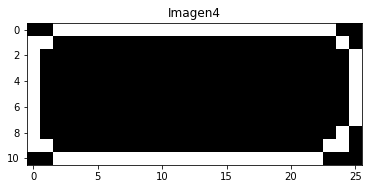

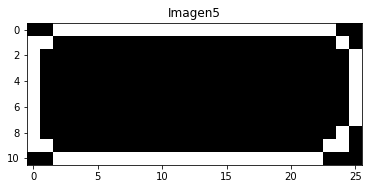

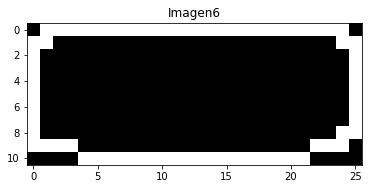

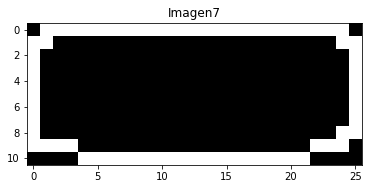

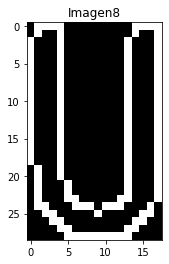

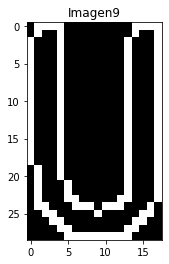

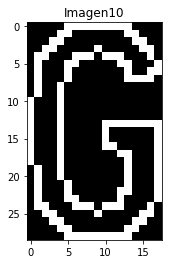

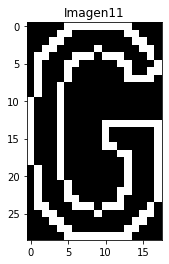

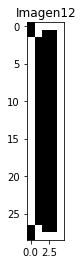

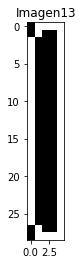

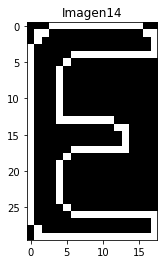

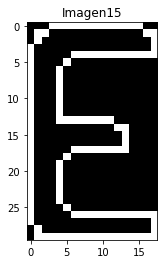

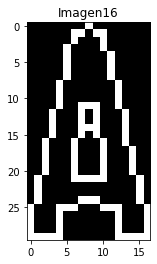

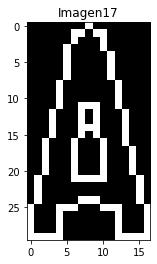

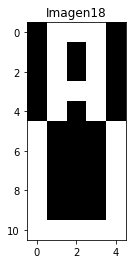

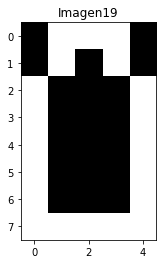

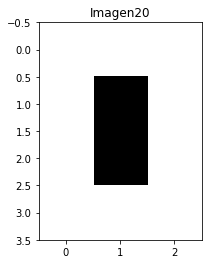

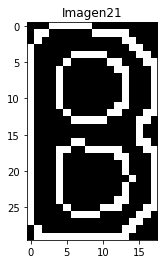

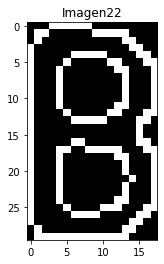

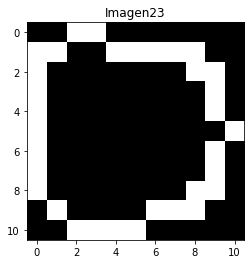

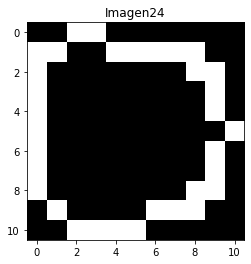

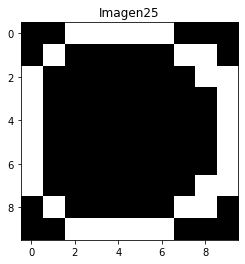

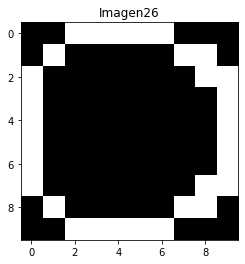

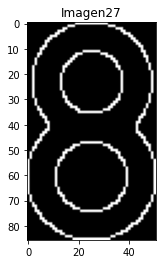

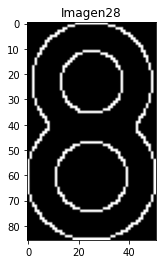

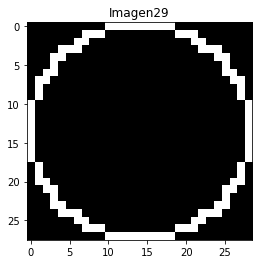

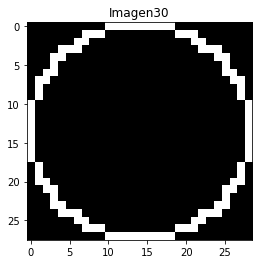

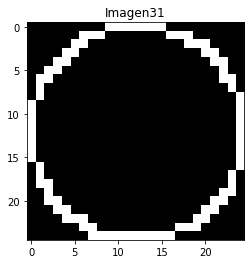

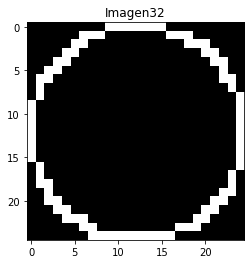

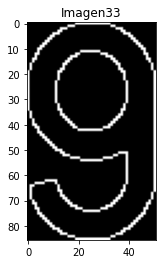

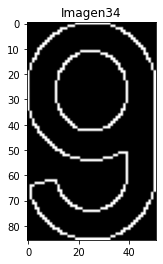

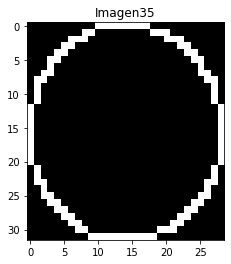

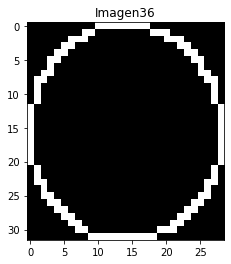

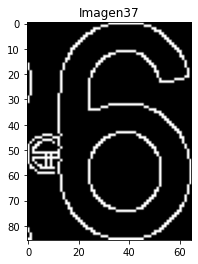

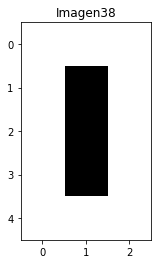

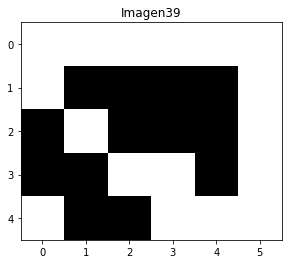

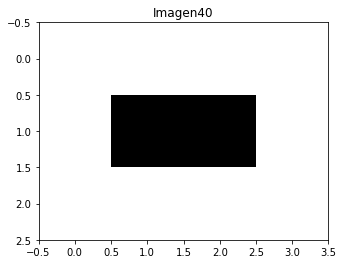

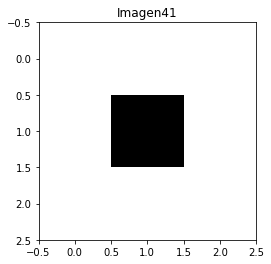

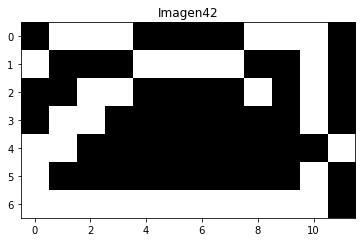

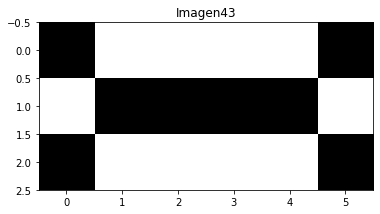

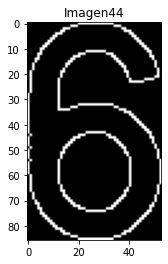

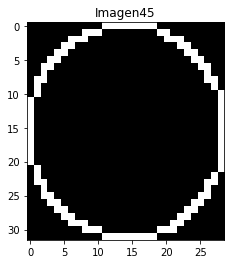

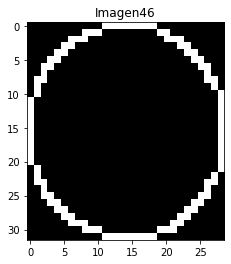

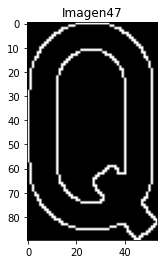

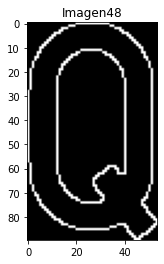

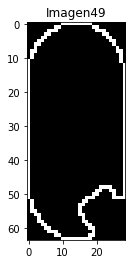

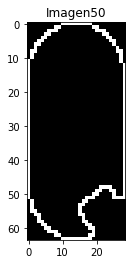

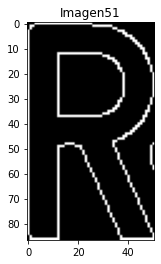

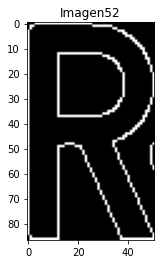

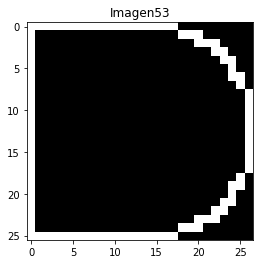

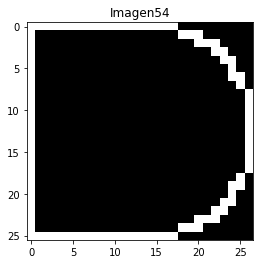

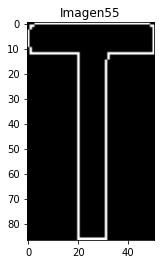

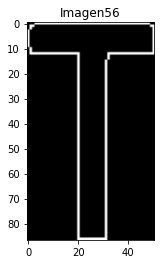

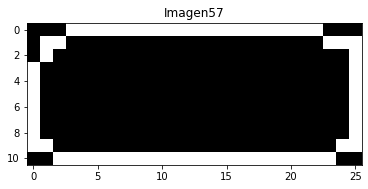

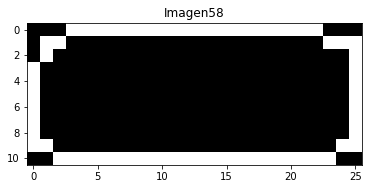

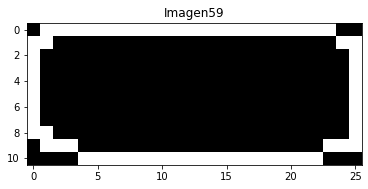

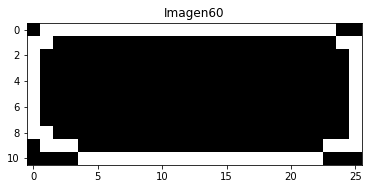

In [8]:
for i in range(len(BOX)):
    GG3 = borde[BOX[i,1]:BOX[i,1]+BOX[i,3],BOX[i,0]:BOX[i,0]+BOX[i,2]]
    plt.imshow(GG3,'gray')
    plt.title("Imagen"+ str(i))
    plt.show()

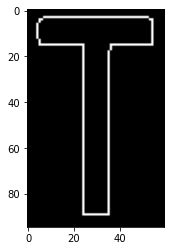

In [9]:
LETRA1 = borde[30:125,15:75]# [verticalk]
plt.imshow(LETRA1,'gray')

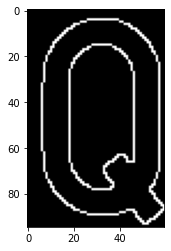

In [10]:
LETRA2 = borde[30:125,75:135]
plt.imshow(LETRA2,'gray')

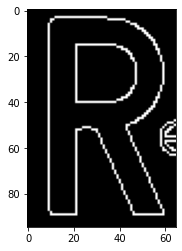

In [11]:
LETRA3 = borde[30:125,135:200]
plt.imshow(LETRA3,'gray')

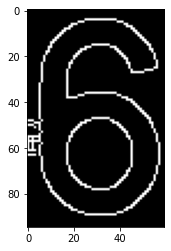

In [12]:
LETRA4 = borde[30:125,200:260]
plt.imshow(LETRA4,'gray')

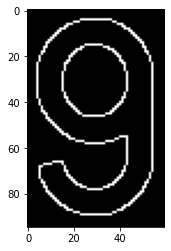

In [13]:
LETRA5 = borde[30:125,265:325]
plt.imshow(LETRA5,'gray')

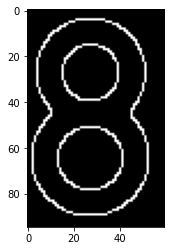

In [17]:
LETRA6 = borde[30:125,330:390]
plt.imshow(LETRA6,'gray')

In [15]:
thresh

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0, 255, ..., 255,   0,   0],
       ...,
       [  0, 255, 255, ..., 255,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [ ]:
269+34

In [ ]:
52+86

In [ ]:
imgray